# Lecture 8

We build a CNN to classify MNIST data.

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
# dense is a fully connected layer
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import numpy as np
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape:{X_train.shape}, X_train type :{type(X_train)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train.shape:(60000, 28, 28), X_train type :<class 'numpy.ndarray'>


Let's evaluate if we need to normalize images

Pixels are spatially related, normalizing by columns can be deleterious

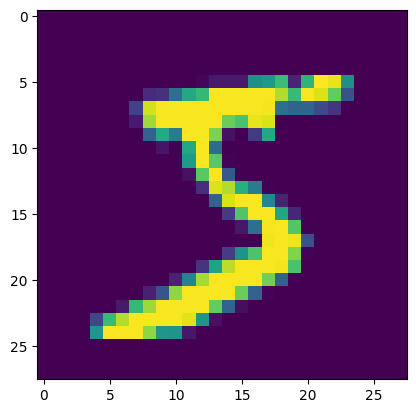

In [3]:
plt.imshow(X_train[0])

In [4]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train[0])

MinMaxScaler()

(28, 28)
np.max(newX0):1.0, np.max(X_train[0]):255


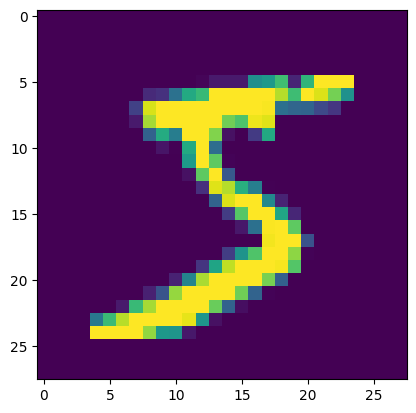

In [5]:
newX0 = mmscaler.transform(X_train[0])
print(newX0.shape)
plt.imshow(newX0)
print(f"np.max(newX0):{np.max(newX0)}, np.max(X_train[0]):{np.max(X_train[0])}")

(28, 28)
np.max(newX0s):4.807278094978601, np.max(X_train[0]):255


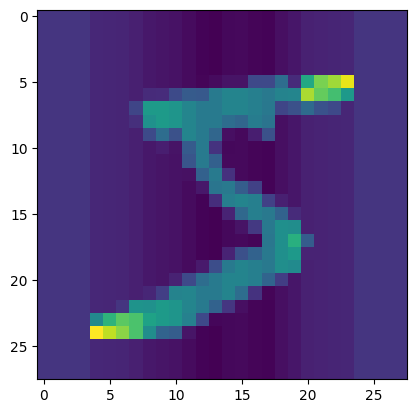

In [6]:
sscaler = StandardScaler()
sscaler.fit(X_train[0])

newX0s = sscaler.transform(X_train[0])
print(newX0s.shape)
plt.imshow(newX0s)
print(f"np.max(newX0s):{np.max(newX0s)}, np.max(X_train[0]):{np.max(X_train[0])}")

### Alternative MinMax

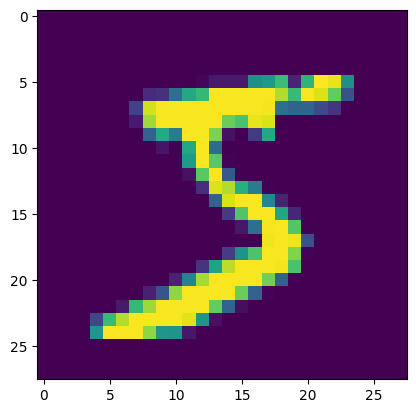

In [7]:
newX0mm = X_train[0] / np.max(X_train[0])
plt.imshow(newX0mm)

We start without normalization.

To feed a CNN we need to add a dimension: the number of input channels.

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(f"X_train.shape:{X_train.shape}")
print(f"X_test.shape:{X_test.shape}")
print(f"np.max(X_train):{np.max(X_train)}, np.min(X_train):{np.min(X_train)}")

X_train.shape:(60000, 28, 28, 1)
X_test.shape:(10000, 28, 28, 1)
np.max(X_train):255.0, np.min(X_train):0.0


The Conv2D Keras layer:
- Allows to create a 2D convolution
- Can be added to a Sequential model like any other layer
